In [2]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Date Functionality
import matplotlib.dates as mdates

# Statistics
from statistics import stdev
from scipy.stats import t

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load Data
df1 = pd.read_csv("QVI_data.csv")
df1

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [5]:
df1.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Select control stores
The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period. We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :

1. Monthly overall sales revenue
2. Monthly number of customers
3. Monthly number of transactions per customer

In [6]:
#### Create a month ID in format yyyymm

df1['YEARMONTH'] = [''.join(x.split('-')[0:2]) for x in df1.DATE]
df1['YEARMONTH'] = pd.to_numeric(df1['YEARMONTH'])
df1['YEARMONTH']

0         201810
1         201809
2         201903
3         201903
4         201811
           ...  
264829    201812
264830    201810
264831    201810
264832    201810
264833    201812
Name: YEARMONTH, Length: 264834, dtype: int64

# For each store and month calculate
Total sales.
Number of customers.
Transactions per customer.
Chips per customer.
Average price per unit.

In [7]:
# Total Sales for each store and month.

Total_Sales= df1.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum()
Total_Sales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [8]:
# Number of customers for each store and month.

no_Customers = df1.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
no_Customers

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [9]:
# Transactions per customer for each store and month.

trans_per_customer = df1.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique()/df1.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
trans_per_customer

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [10]:
# Chips per customer for each store and month.

chips_per_customer = df1.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum()/ df1.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique()
chips_per_customer

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.909091
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [11]:
# Average price per unit for each store and month.

average_price = df1.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum()/ df1.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum()
average_price

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [12]:
# Concatenate into a new dataframe 'measureOverTime'

df2 = [Total_Sales, no_Customers, trans_per_customer, chips_per_customer, average_price]
measureOverTime = pd.concat(df2, join = 'outer', axis = 1)
measureOverTime

TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR YEARMONTH                                                         
1         201807         206.9              49  1.061224  1.192308  3.337097
          201808         176.1              42  1.023810  1.255814  3.261111
          201809         278.8              59  1.050847  1.209677  3.717333
          201810         188.1              44  1.022727  1.288889  3.243103
          201811         192.6              46  1.021739  1.212766  3.378947
...                        ...             ...       ...       ...       ...
272       201902         395.5              45  1.066667  1.895833  4.346154
          201903         442.3              50  1.060000  1.905660  4.379208
          201904         445.1              54  1.018519  1.909091  4.239048
          201905         314.6              34  1.176471  1.775000  4.430986
          201906         312.1              34  1.088235  1.891892  4.458571

[3169 rows x 5 columns]

In [13]:
# Rename the columns

measureOverTime.rename(columns = {'TOT_SALES': 'Total Sales', 'LYLTY_CARD_NBR': 'no_Customers', 0: 'trans_per_customer', 1: 'chips_per_customer', 2: 'average_price'}, inplace = True)
measureOverTime.head(15)

Total Sales  no_Customers  trans_per_customer  \
STORE_NBR YEARMONTH                                                  
1         201807           206.9            49            1.061224   
          201808           176.1            42            1.023810   
          201809           278.8            59            1.050847   
          201810           188.1            44            1.022727   
          201811           192.6            46            1.021739   
          201812           189.6            42            1.119048   
          201901           154.8            35            1.028571   
          201902           225.4            52            1.057692   
          201903           192.9            45            1.088889   
          201904           192.9            42            1.023810   
          201905           221.4            46            1.108696   
          201906           174.1            42            1.000000   
2         201807           150.8            39            1.051282   
          201808           193.8            39            1.102564   
          201809           154.4            36            1.027778   

                     chips_per_customer  average_price  
STORE_NBR YEARMONTH                                     
1         201807               1.192308       3.337097  
          201808               1.255814       3.261111  
          201809               1.209677       3.717333  
          201810               1.288889       3.243103  
          201811               1.212766       3.378947  
          201812               1.212766       3.326316  
          201901               1.166667       3.685714  
          201902               1.181818       3.467692  
          201903               1.183673       3.325862  
          201904               1.325581       3.384211  
          201905               1.294118       3.354545  
          201906               1.261905       3.284906  
2         201807               1.121951       3.278261  
          201808               1.279070       3.523636  
          201809               1.108108       3.765854

In [14]:
measureOverTime.reset_index(inplace = True)
measureOverTime

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [15]:
#### Filter to the pre-trial period and stores with full observation periods

df3 = pd.pivot_table(df1, index = 'STORE_NBR', columns = 'YEARMONTH', values = 'TXN_ID', aggfunc = 'count')
df3

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [16]:
# Store numbers that do not have full observation periods

null_stores = df3[df3.isnull().any(axis=1)].index.tolist()
null_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [17]:
# Filter out the null stores

measureOverTime = measureOverTime[~measureOverTime['STORE_NBR'].isin(null_stores)]
measureOverTime

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [18]:
# Filter to pre-trial period before 201902
preTrialMeasures = measureOverTime[measureOverTime['YEARMONTH'] < 201902]
preTrialMeasures

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.136364,1.980000,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


We need to work out a way of ranking how similar each potential control store is to the trial store. This can be calculated by correlating the performance of each store to the trial store.

In [19]:
#Let's write a function for this so that we don't have to calculate this for each trial store and control store pair.
#### Create a function to calculate correlation for a measure

def calculateCorrelation(inputTable, metricCol, storeComparison):
    calcCorrTable = pd.DataFrame({'Store1': [], 'Store2': [], 'corr_measure': []})
    x = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metricCol]
    x.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        y = inputTable.loc[inputTable['STORE_NBR'] == i, metricCol]
        y.reset_index(drop = True, inplace = True)
        calcCorrTable = calcCorrTable.append({'Store1': trial_store, 'Store2': i, 'corr_measure': y.corr(x)}, ignore_index = True)
    return calcCorrTable

A standardised metric based on the absolute difference between the trial store's performance and each control store'sperformance can also be calculated.

In [20]:
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    calcDistTable = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    x = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metricCol]
    x.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        y = inputTable.loc[inputTable['STORE_NBR'] == i, metricCol]
        y.reset_index(drop = True, inplace = True)
        z = abs(x-y)
        A = np.mean(1-(z-min(z))/(max(z)-min(z)))
        calcDistTable = calcDistTable.append({'Store1': trial_store, 'Store2': i, 'Magnitude': A}, ignore_index = True)
    return calcDistTable    

Select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores.
Selecting control store for trial store 77

In [22]:
trial_store = 77

corr_Sales = calculateCorrelation(preTrialMeasures, 'Total Sales', trial_store)
corr_Customers = calculateCorrelation(preTrialMeasures, 'no_Customers', trial_store)

# Compute magnitude with trial store 77
magnitude_Sales = calculateMagnitudeDistance(preTrialMeasures, 'Total Sales', trial_store)
magnitude_Customers = calculateMagnitudeDistance(preTrialMeasures, 'no_Customers', trial_store)

In [23]:
score_Sales = pd.concat([corr_Sales, magnitude_Sales['Magnitude']], axis = 1)
score_Sales

,Store1,Store2,corr_measure,Magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [24]:
score_Customers = pd.concat([corr_Customers, magnitude_Customers['Magnitude']], axis = 1)
score_Customers

,Store1,Store2,corr_measure,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605
...,...,...,...,...
255,77.0,268.0,0.369517,0.571429
256,77.0,269.0,-0.474293,0.484472
257,77.0,270.0,-0.131259,0.536680
258,77.0,271.0,0.019629,0.328571


In [25]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_Sales['scoreSales'] = corr_weight * score_Sales['corr_measure'] + (1 - corr_weight) * score_Sales['Magnitude']
score_Customers['scoreCustomers'] = corr_weight * score_Customers['corr_measure'] + (1 - corr_weight) * score_Customers['Magnitude']
score_Sales.set_index(['Store1', 'Store2'], inplace = True)
score_Customers.set_index(['Store1', 'Store2'], inplace = True)

score_Control = pd.concat([score_Sales['scoreSales'], score_Customers['scoreCustomers']], axis = 1)
score_Control

scoreSales  scoreCustomers
Store1 Store2                            
77.0   1.0       0.241691        0.493017
       2.0       0.163520       -0.050311
       3.0       0.664779        0.662002
       4.0       0.190817        0.101310
       5.0       0.202834        0.441632
...                   ...             ...
       268.0     0.387272        0.470473
       269.0     0.121684        0.005090
       270.0     0.453489        0.202710
       271.0     0.348289        0.174100
       272.0     0.320626        0.384336

[260 rows x 2 columns]

In [26]:
# Add a new column 'finalControlScore' to 'score_Control'.

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreSales'] + score_Control['scoreCustomers'])
score_Control

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
77.0   1.0       0.241691        0.493017           0.367354
       2.0       0.163520       -0.050311           0.056604
       3.0       0.664779        0.662002           0.663390
       4.0       0.190817        0.101310           0.146064
       5.0       0.202834        0.441632           0.322233
...                   ...             ...                ...
       268.0     0.387272        0.470473           0.428872
       269.0     0.121684        0.005090           0.063387
       270.0     0.453489        0.202710           0.328100
       271.0     0.348289        0.174100           0.261195
       272.0     0.320626        0.384336           0.352481

[260 rows x 3 columns]

In [27]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
77.0   233.0     0.697290        0.816607           0.756949
       71.0      0.789497        0.663123           0.726310
       84.0      0.656972        0.715000           0.685986
       119.0     0.636046        0.729729           0.682887
       115.0     0.708347        0.645155           0.676751

 Let's do a visual check to see if the drivers are indeed similar in the period before the trial.
Let's look at total sales first.

In [28]:
control_store = 233

pastSales = preTrialMeasures

store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores


In [29]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')
pastSales['TransactionMonth']

0      2018-07-01
1      2018-08-01
2      2018-09-01
3      2018-10-01
4      2018-11-01
          ...    
3159   2018-09-01
3160   2018-10-01
3161   2018-11-01
3162   2018-12-01
3163   2019-01-01
Name: TransactionMonth, Length: 1820, dtype: datetime64[ns]

In [30]:
pastSales['Month'] = pd.DatetimeIndex(pastSales['TransactionMonth']).month_name().str[:3]
pastSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,store_type,TransactionMonth,Month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01,Jul
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01,Aug
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01,Sep
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01,Oct
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01,Nov
...,...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549,Other Stores,2018-09-01,Sep
3160,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01,Oct
3161,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01,Nov
3162,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01,Dec


In [31]:
controlPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'Total Sales']]
controlPlot.set_index('Month', inplace = True)

trialPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'Total Sales']]
trialPlot.set_index('Month', inplace = True)

otherPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'Total Sales']]
otherPlot = pd.DataFrame(otherPlot.groupby('Month')['Total Sales'].mean())

# Renaming Column Names
controlPlot.rename(columns = {'Total Sales': 'Control Store Sales'}, inplace = True)
trialPlot.rename(columns = {'Total Sales': 'Trial Store Sales'}, inplace = True)
otherPlot.rename(columns = {'Total Sales': 'Other Stores Sales'}, inplace = True)

# Concatenate
combinePlot = pd.concat([controlPlot, trialPlot, otherPlot], axis = 1)

combinePlot


,Control Store Sales,Trial Store Sales,Other Stores Sales
Month,,,
Jul,290.7,296.8,638.004651
Aug,285.9,255.5,610.223450
Sep,228.6,225.2,620.198450
Oct,185.7,204.5,635.314729
Nov,211.6,245.3,618.864341
Dec,279.8,267.3,648.453876
Jan,177.5,204.4,628.684496


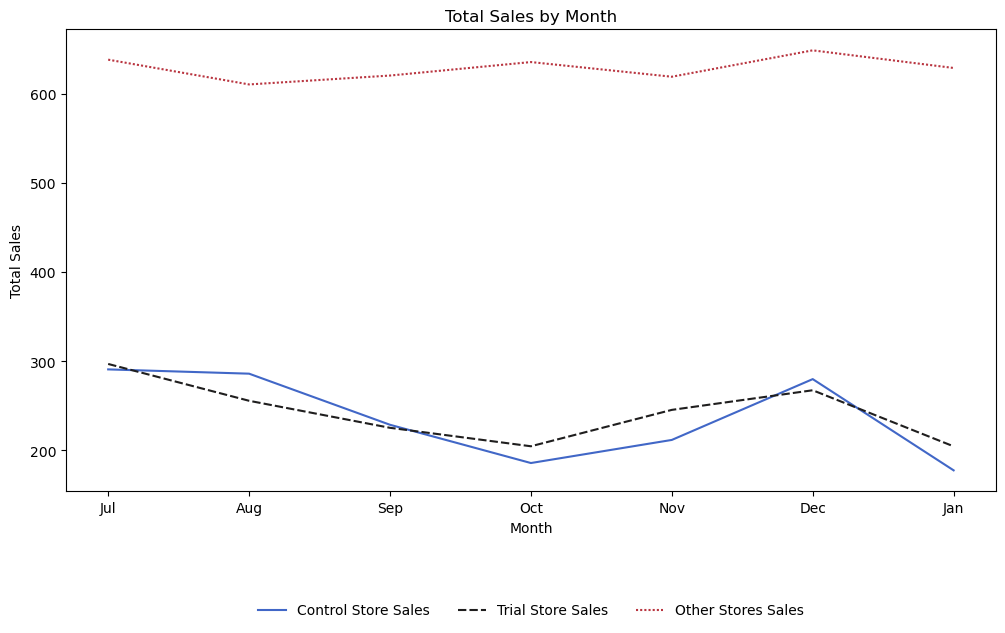

In [33]:
# Plot total Sales for all 3 types of stores


plt.figure(figsize = (12, 6))
plt.title('Total Sales by Month')
ax = sns.lineplot(data=combinePlot, palette="icefire")

plt.ylabel("Total Sales")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    frameon=False,
)


Visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [34]:
control_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'no_Customers']]
control_Customer_Plot.set_index('Month', inplace = True)

trial_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'no_Customers']]
trial_Customer_Plot.set_index('Month', inplace = True)

other_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'no_Customers']]
other_Customer_Plot = pd.DataFrame(other_Customer_Plot.groupby('Month')['no_Customers'].mean())

# Renaming Column Names
control_Customer_Plot.rename(columns = {'no_Customers': 'Control Store Customers'}, inplace = True)
trial_Customer_Plot.rename(columns = {'no_Customers': 'Trial Store Customers'}, inplace = True)
other_Customer_Plot.rename(columns = {'no_Customers': 'Other Stores Customers'}, inplace = True)

# Concatenate
combine_Customer_Plot = pd.concat([control_Customer_Plot, trial_Customer_Plot, other_Customer_Plot], axis = 1)

combine_Customer_Plot

,Control Store Customers,Trial Store Customers,Other Stores Customers
Month,,,
Jul,51,51,72.333333
Aug,48,47,72.120155
Sep,42,42,70.131783
Oct,35,37,71.608527
Nov,40,41,70.534884
Dec,47,46,73.515504
Jan,35,35,71.240310


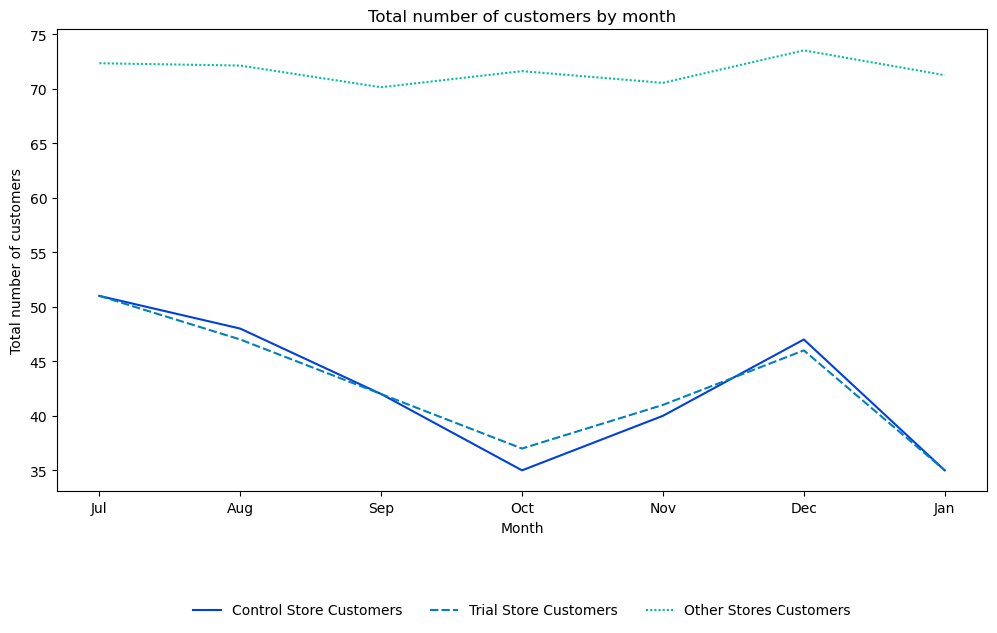

In [35]:
# Plot total number of customers for all 3 types of stores

plt.figure(figsize = (12, 6))
plt.title('Total number of customers by month')
ax1 = sns.lineplot(data=combine_Customer_Plot, palette="winter")

plt.ylabel("Total number of customers")
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    frameon=False,
)

Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

In [36]:
preTrialMeasures

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,store_type,TransactionMonth,Month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01,Jul
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01,Aug
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01,Sep
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01,Oct
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01,Nov
...,...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549,Other Stores,2018-09-01,Sep
3160,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01,Oct
3161,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01,Nov
3162,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01,Dec


In [37]:
# Scale pre-trial control sales to match pre-trial trial store sales

trial_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Total Sales'].sum()
control_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store' , 'Total Sales'].sum()
scalingFactorForControlSales = trial_sales_sum/ control_sales_sum
scalingFactorForControlSales

1.023617303289553

In [38]:
# Apply the scaling factor

measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['Total Sales'] * scalingFactorForControlSales
scaledControlSales


,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,controlSales
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704


In [39]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,controlSales,TransactionMonth
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421,2018-11-01
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121,2018-12-01
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071,2019-01-01
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622,2019-02-01
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205,2019-03-01
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704,2019-04-01


With the comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [40]:
measureOverTime

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [41]:
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)
trial_sales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store , 'Total Sales']
trial_sales.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trial_sales], axis = 1)
percentageDiff.rename(columns = {'Total Sales': 'Trial_Sales'}, inplace = True)
percentageDiff

,YEARMONTH,controlSales,Trial_Sales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [42]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.Trial_Sales) / percentageDiff.controlSales
percentageDiff


,YEARMONTH,controlSales,Trial_Sales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


Since our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [43]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.04994076264142537

In [44]:
# Note that there are 8 months in the pre-trial period , Hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7

In [45]:
#We will test with a null hypothesis of there being 0 difference between trial and control stores.
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] < 201905 ) & (percentageDiff['YEARMONTH'] > 201901), 'tValue']

7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [46]:
# Find the 95th percentile of the t distribution with the degreesOfFreedom = 7

t95 = t.isf(0.05, degreesOfFreedom)
print('95th percentile of the t distribution with the degrees Of Freedom 7   -', t95)

95th percentile of the t distribution with the degrees Of Freedom 7   - 1.8945786050613054


It can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [47]:
measureOverTimeSales = measureOverTime
measureOverTimeSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [48]:
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(measureOverTimeSales['YEARMONTH'].astype(str), format = '%Y%m')
measureOverTimeSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [49]:
# Trial and control store total sales

pastSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Total Sales']]
pastSales.set_index('TransactionMonth', inplace = True)
pastSales.rename(columns = {'Total Sales': 'Trial Sales'}, inplace = True)
pastSales

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [50]:
# Control store 95th percentile

controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales


,Control Sales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [51]:
# Control store 95th percentile
controlSales['Control store 95th percentile'] = controlSales['Control Sales'] * (1 + stdDev*2)

#### Control store 5th percentile

controlSales['Control store 5th percentile'] = controlSales['Control Sales'] * (1 - stdDev*2)

controlSales

,Control Sales,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,
2018-07-01,297.565550,327.286851,267.844249
2018-08-01,292.652187,321.882734,263.421640
2018-09-01,233.998916,257.371084,210.626747
2018-10-01,190.085733,209.071786,171.099680
2018-11-01,216.597421,238.231502,194.963341
2018-12-01,286.408121,315.015001,257.801241
2019-01-01,181.692071,199.839753,163.544390
2019-02-01,249.762622,274.709294,224.815950
2019-03-01,203.802205,224.158280,183.446130


In [52]:
trialAssessment = pd.merge(controlSales, pastSales, left_index = True, right_index = True)
trialAssessment

,Control Sales,Control store 95th percentile,Control store 5th percentile,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,327.286851,267.844249,296.8
2018-08-01,292.652187,321.882734,263.421640,255.5
2018-09-01,233.998916,257.371084,210.626747,225.2
2018-10-01,190.085733,209.071786,171.099680,204.5
2018-11-01,216.597421,238.231502,194.963341,245.3
2018-12-01,286.408121,315.015001,257.801241,267.3
2019-01-01,181.692071,199.839753,163.544390,204.4
2019-02-01,249.762622,274.709294,224.815950,235.0
2019-03-01,203.802205,224.158280,183.446130,278.5


Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

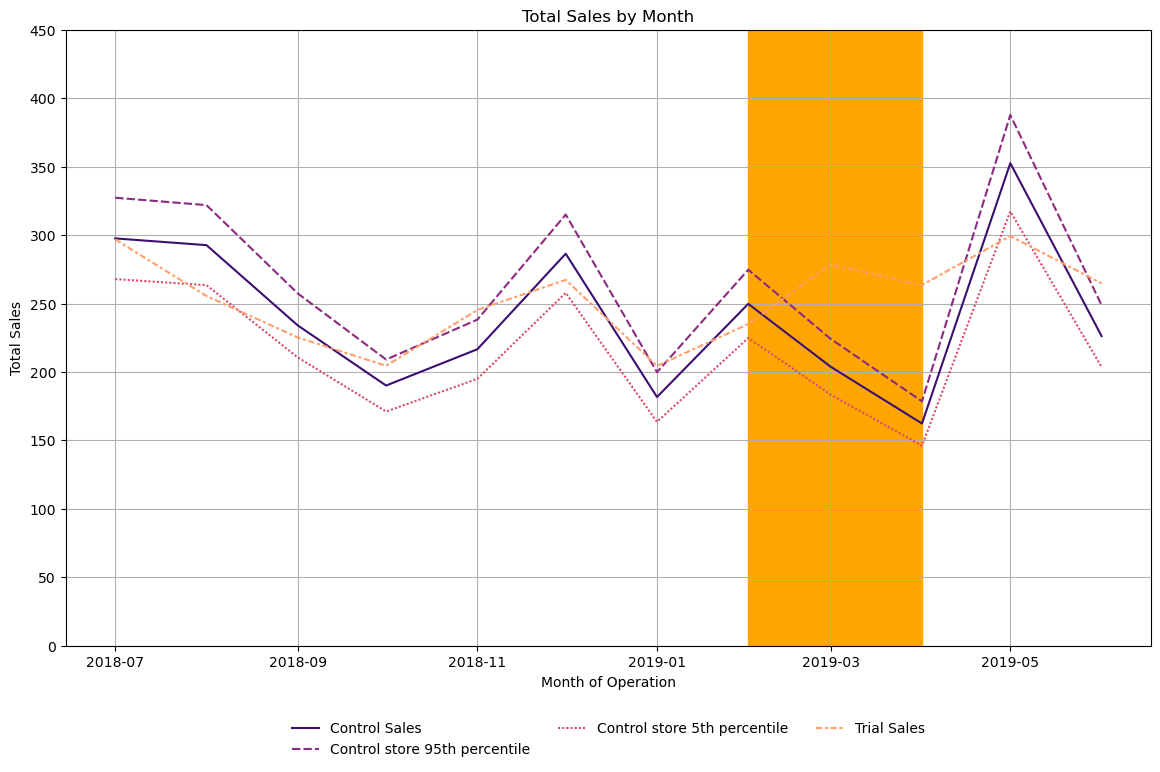

In [53]:
plt.figure(figsize = (14,8))
ax2 = sns.lineplot(data=trialAssessment, palette = 'magma')

sns.move_legend(
    ax2, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.ylim((0, 450))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'orange', alpha = 1)
plt.grid()

The trial period is highlighted by the orange strip.
The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.
Let's have a look at assessing this for number of customers as well.

In [54]:
trial_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'no_Customers'].sum()
control_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'no_Customers'].sum()
scalingFactorForControlCust = trial_customers / control_customers
scalingFactorForControlCust

1.0033557046979866

In [55]:
measureOverTimeCusts = measureOverTime
measureOverTimeCusts

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [56]:
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store]
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,2018-12-01
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,2019-01-01
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,2019-02-01
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,2019-03-01
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,2019-04-01


In [57]:
scaledControlCustomers['Control_Customers'] = scaledControlCustomers['no_Customers'] * scalingFactorForControlCust
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth,Control_Customers
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,40.134228
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,2018-12-01,47.157718
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,2019-01-01,35.117450
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,2019-02-01,45.151007
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,2019-03-01,40.134228
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,2019-04-01,30.100671


In [58]:
# Calculate the percentage difference between scaled control customers. and trial customers.

percentageDiff = scaledControlCustomers[['YEARMONTH','Control_Customers']]
percentageDiff.reset_index(drop = True, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers
0,201807,51.171141
1,201808,48.161074
2,201809,42.140940
3,201810,35.117450
4,201811,40.134228
5,201812,47.157718
6,201901,35.117450
7,201902,45.151007
8,201903,40.134228
9,201904,30.100671


In [59]:
trial_Customers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'no_Customers']
trial_Customers.reset_index(drop = True, inplace = True)
trial_Customers

0     51
1     47
2     42
3     37
4     41
5     46
6     35
7     45
8     50
9     47
10    55
11    41
Name: no_Customers, dtype: int64

In [60]:
percentageDiff = pd.concat([percentageDiff, trial_Customers], axis = 1)
percentageDiff.rename(columns = {'no_Customers': 'Trial_Customers'}, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers
0,201807,51.171141,51
1,201808,48.161074,47
2,201809,42.140940,42
3,201810,35.117450,37
4,201811,40.134228,41
5,201812,47.157718,46
6,201901,35.117450,35
7,201902,45.151007,45
8,201903,40.134228,50
9,201904,30.100671,47


In [61]:
percentageDiff['percentageDiff'] = abs(percentageDiff.Control_Customers - percentageDiff.Trial_Customers) / percentageDiff.Control_Customers
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


Let’s check if the difference is significant visually! Also since our null hypothesis is that the trial period is the same as the pre‐trial period, let's take the standard deviation based on the scaledpercentage difference in the pre‐trial period

In [62]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])

degreesOfFreedom = 7

percentageDiff['T_value'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'T_value']

7     0.183352
8    13.476388
9    30.778725
Name: T_value, dtype: float64

In [63]:
# 95th percentile of the t distribution with degreesOfFreedom = 7

t95 = t.isf(0.05, degreesOfFreedom)
print('95th percentile of the t distribution with the degrees Of Freedom 7   -', t95)

95th percentile of the t distribution with the degrees Of Freedom 7   - 1.8945786050613054


We Can see that the t-value is much greater than the 95th percentile of the t distribution

In [64]:
controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'Control_Customers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers

,Control_Customers
TransactionMonth,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [65]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, ['TransactionMonth', 'no_Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'no_Customers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [66]:
# Control store 95th percentile
controlCustomers['Control 95th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 + stdDev*2)
controlCustomers['Control 5th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 - stdDev*2)

# Merge trial store as well to the control store dataframe.
trial_77_Customer_Assessment = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
trial_77_Customer_Assessment

,Control_Customers,Control 95th % confidence Interval,Control 5th % confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,51.171141,53.037941,49.304341,51
2018-08-01,48.161074,49.918062,46.404086,47
2018-09-01,42.140940,43.678304,40.603575,42
2018-10-01,35.117450,36.398587,33.836313,37
2018-11-01,40.134228,41.598385,38.670071,41
2018-12-01,47.157718,48.878102,45.437334,46
2019-01-01,35.117450,36.398587,33.836313,35
2019-02-01,45.151007,46.798183,43.503830,45
2019-03-01,40.134228,41.598385,38.670071,50


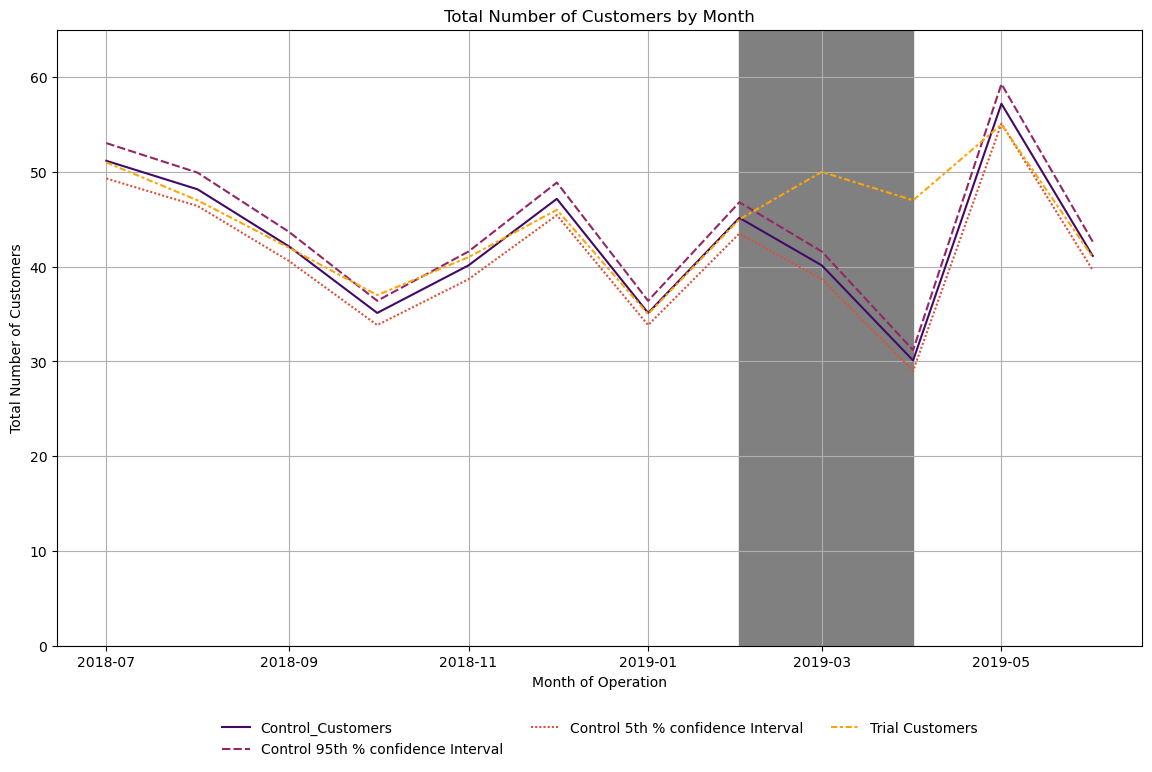

In [67]:
plt.figure(figsize = (14,8))
ax3 = sns.lineplot(data=trial_77_Customer_Assessment, palette = 'inferno')

sns.move_legend(
    ax3, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')
plt.ylim((0, 65))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 1)
plt.grid()

Let’s locate the control store and assess the impact of the trial for each of the other two trial stores.


# Trial store 86

In [69]:
trial_store = 86

corr_Sales = calculateCorrelation(preTrialMeasures, 'Total Sales', trial_store)
corr_Customers = calculateCorrelation(preTrialMeasures, 'no_Customers', trial_store)

# Compute magnitude with trial store 86
magnitude_Sales = calculateMagnitudeDistance(preTrialMeasures, 'Total Sales', trial_store)
magnitude_Customers = calculateMagnitudeDistance(preTrialMeasures, 'no_Customers', trial_store)
score_Sales = pd.concat([corr_Sales, magnitude_Sales['Magnitude']], axis = 1)
score_Sales

,Store1,Store2,corr_measure,Magnitude
0,86.0,1.0,0.445632,0.488334
1,86.0,2.0,-0.403835,0.321131
2,86.0,3.0,-0.261284,0.507515
3,86.0,4.0,-0.039035,0.635654
4,86.0,5.0,0.235159,0.579835
...,...,...,...,...
255,86.0,268.0,-0.452182,0.291930
256,86.0,269.0,0.697055,0.480267
257,86.0,270.0,-0.730679,0.517014
258,86.0,271.0,0.527637,0.565665


In [70]:
score_Customers = pd.concat([corr_Customers, magnitude_Customers['Magnitude']], axis = 1)
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_Sales['scoreSales'] = corr_weight * score_Sales['corr_measure'] + (1 - corr_weight) * score_Sales['Magnitude']
score_Customers['scoreCustomers'] = corr_weight * score_Customers['corr_measure'] + (1 - corr_weight) * score_Customers['Magnitude']
score_Sales.set_index(['Store1', 'Store2'], inplace = True)
score_Customers.set_index(['Store1', 'Store2'], inplace = True)

score_Control = pd.concat([score_Sales['scoreSales'], score_Customers['scoreCustomers']], axis = 1)
score_Control

scoreSales  scoreCustomers
Store1 Store2                            
86.0   1.0       0.466983        0.498018
       2.0      -0.041352        0.171205
       3.0       0.123116        0.104620
       4.0       0.298309        0.184103
       5.0       0.407497        0.230528
...                   ...             ...
       268.0    -0.080126        0.266027
       269.0     0.588661        0.241523
       270.0    -0.106832       -0.058237
       271.0     0.546651        0.432804
       272.0     0.294383        0.139863

[260 rows x 2 columns]

In [71]:
# Add a new column 'finalControlScore' to 'score_Control'.

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreSales'] + score_Control['scoreCustomers'])

score_Control

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
86.0   1.0       0.466983        0.498018           0.482500
       2.0      -0.041352        0.171205           0.064927
       3.0       0.123116        0.104620           0.113868
       4.0       0.298309        0.184103           0.241206
       5.0       0.407497        0.230528           0.319013
...                   ...             ...                ...
       268.0    -0.080126        0.266027           0.092950
       269.0     0.588661        0.241523           0.415092
       270.0    -0.106832       -0.058237          -0.082535
       271.0     0.546651        0.432804           0.489727
       272.0     0.294383        0.139863           0.217123

[260 rows x 3 columns]

In [77]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
86.0   155.0     0.808106        0.733343           0.770724
       109.0     0.697120        0.742532           0.719826
       114.0     0.631393        0.663384           0.647389
       225.0     0.601841        0.684356           0.643099
       138.0     0.593296        0.660565           0.626930

For Trial Store 86, control store is 155.

In [78]:
control_store = 155
pastSales = preTrialMeasures

store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,store_type,TransactionMonth,Month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01,Jul
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01,Aug
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01,Sep
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01,Oct
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01,Nov


In [79]:
controlPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'Total Sales']]
controlPlot.set_index('Month', inplace = True)

trialPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'Total Sales']]
trialPlot.set_index('Month', inplace = True)

otherPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'Total Sales']]
otherPlot = pd.DataFrame(otherPlot.groupby('Month')['Total Sales'].mean())

# Renaming Column Names
controlPlot.rename(columns = {'Total Sales': 'Control Store Sales'}, inplace = True)
trialPlot.rename(columns = {'Total Sales': 'Trial Store Sales'}, inplace = True)
otherPlot.rename(columns = {'Total Sales': 'Other Stores Sales'}, inplace = True)

# Concatenate
combinePlot = pd.concat([controlPlot, trialPlot, otherPlot], axis = 1)

combinePlot


,Control Store Sales,Trial Store Sales,Other Stores Sales
Month,,,
Jul,924.6,892.20,633.239922
Aug,782.7,764.05,606.326744
Sep,1014.4,914.60,614.480620
Oct,963.8,948.40,629.415504
Nov,898.8,918.00,613.593411
Dec,849.8,841.20,644.020155
Jan,874.6,841.40,623.513566


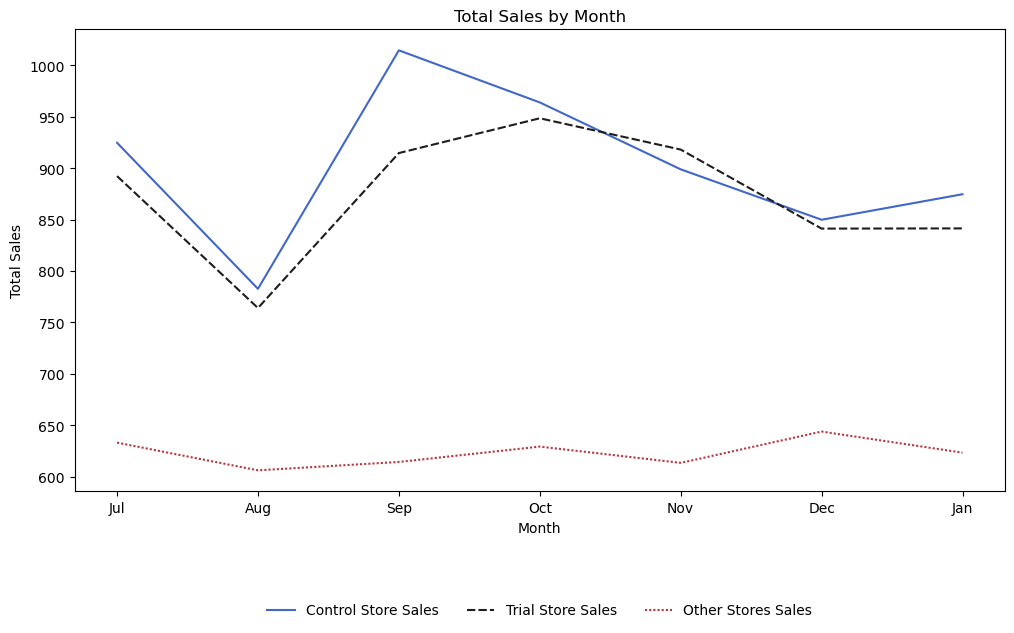

In [80]:
# Plot total Sales for all 3 types of stores


plt.figure(figsize = (12, 6))
plt.title('Total Sales by Month')
ax = sns.lineplot(data=combinePlot, palette="icefire")

plt.ylabel("Total Sales")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    frameon=False,
)

Visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [81]:
control_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'no_Customers']]
control_Customer_Plot.set_index('Month', inplace = True)

trial_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'no_Customers']]
trial_Customer_Plot.set_index('Month', inplace = True)

other_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'no_Customers']]
other_Customer_Plot = pd.DataFrame(other_Customer_Plot.groupby('Month')['no_Customers'].mean())

# Renaming Column Names
control_Customer_Plot.rename(columns = {'no_Customers': 'Control Store Customers'}, inplace = True)
trial_Customer_Plot.rename(columns = {'no_Customers': 'Trial Store Customers'}, inplace = True)
other_Customer_Plot.rename(columns = {'no_Customers': 'Other Stores Customers'}, inplace = True)

# Concatenate
combine_Customer_Plot = pd.concat([control_Customer_Plot, trial_Customer_Plot, other_Customer_Plot], axis = 1)

combine_Customer_Plot

,Control Store Customers,Trial Store Customers,Other Stores Customers
Month,,,
Jul,101,99,71.953488
Aug,91,94,71.771318
Sep,103,103,69.658915
Oct,108,109,71.046512
Nov,101,100,70.069767
Dec,97,98,73.120155
Jan,96,94,70.775194


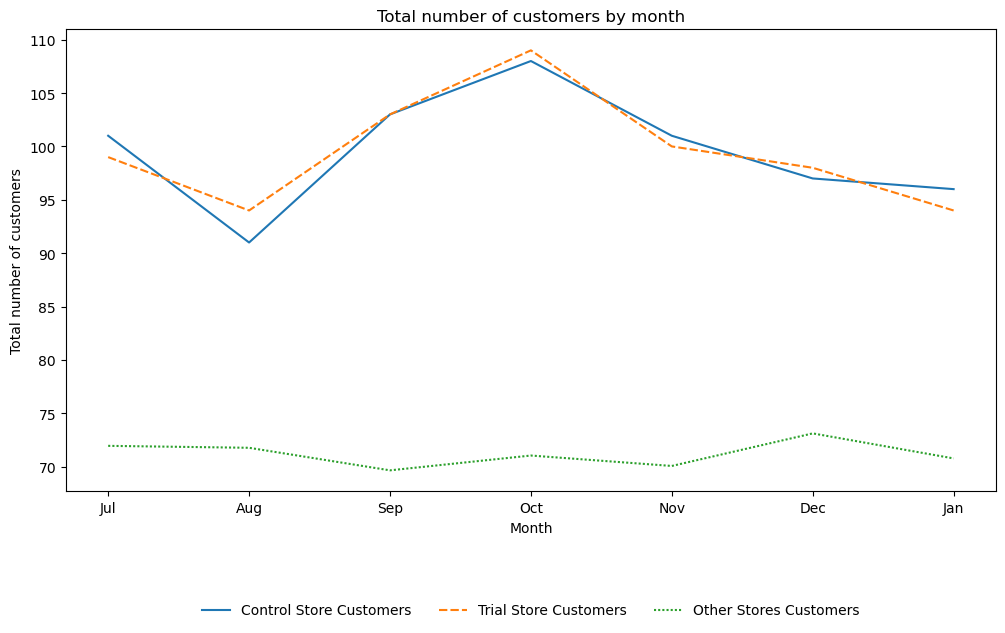

In [82]:
# Plot total number of customers for all 3 types of stores

plt.figure(figsize = (12, 6))
plt.title('Total number of customers by month')
ax1 = sns.lineplot(data=combine_Customer_Plot)

plt.ylabel("Total number of customers")
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    frameon=False,
)

Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

In [83]:
# Scale pre-trial control sales to match pre-trial trial store sales

trial_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Total Sales'].sum()
control_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store' , 'Total Sales'].sum()
scalingFactorForControlSales = trial_sales_sum/ control_sales_sum
scalingFactorForControlSales

0.9700651481287743

In [84]:
# Apply the scaling factor

measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['Total Sales'] * scalingFactorForControlSales
scaledControlSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth,controlSales
1793,155,201807,924.60,101,1.217822,2.032520,3.698400,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,1.924370,3.417904,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,2.013889,3.497931,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,2.030075,3.328889,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,2.016667,3.511570,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,2.016000,3.470635,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,2.032000,3.508661,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,2.033898,3.351667,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,2.016667,3.490083,2019-04-01,819.317024


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [85]:
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)
trial_sales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store , 'Total Sales']
trial_sales.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trial_sales], axis = 1)
percentageDiff.rename(columns = {'Total Sales': 'Trial_Sales'}, inplace = True)
percentageDiff

,YEARMONTH,controlSales,Trial_Sales
0,201807,896.922236,892.20
1,201808,759.269991,764.05
2,201809,984.034086,914.60
3,201810,934.948790,948.40
4,201811,871.894555,918.00
5,201812,824.361363,841.20
6,201901,848.418979,841.40
7,201902,864.522060,913.20
8,201903,780.320405,1026.80
9,201904,819.317024,848.20


In [86]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.Trial_Sales) / percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,Trial_Sales,percentageDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


Since the null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [87]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.025833952854772368

In [88]:
# Note that there are 8 months in the pre-trial period , Hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7
measureOverTimeSales = measureOverTime
measureOverTimeSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [89]:
# Trial and control store total sales

pastSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Total Sales']]
pastSales.set_index('TransactionMonth', inplace = True)
pastSales.rename(columns = {'Total Sales': 'Trial Sales'}, inplace = True)
pastSales

,Trial Sales
TransactionMonth,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [90]:
# Control store 95th percentile

controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionMonth,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [91]:
# Control store 95th percentile
controlSales['Control store 95th percentile'] = controlSales['Control Sales'] * (1 + stdDev*2)

#### Control store 5th percentile

controlSales['Control store 5th percentile'] = controlSales['Control Sales'] * (1 - stdDev*2)

controlSales

,Control Sales,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,
2018-07-01,896.922236,943.264329,850.580142
2018-08-01,759.269991,798.499882,720.040101
2018-09-01,984.034086,1034.877067,933.191106
2018-10-01,934.948790,983.255636,886.641944
2018-11-01,871.894555,916.943521,826.845589
2018-12-01,824.361363,866.954388,781.768338
2019-01-01,848.418979,892.255010,804.582947
2019-02-01,864.522060,909.190104,819.854016
2019-03-01,780.320405,820.637926,740.002884


In [92]:
trialAssessment = pd.merge(controlSales, pastSales, left_index = True, right_index = True)
trialAssessment

,Control Sales,Control store 95th percentile,Control store 5th percentile,Trial Sales
TransactionMonth,,,,
2018-07-01,896.922236,943.264329,850.580142,892.20
2018-08-01,759.269991,798.499882,720.040101,764.05
2018-09-01,984.034086,1034.877067,933.191106,914.60
2018-10-01,934.948790,983.255636,886.641944,948.40
2018-11-01,871.894555,916.943521,826.845589,918.00
2018-12-01,824.361363,866.954388,781.768338,841.20
2019-01-01,848.418979,892.255010,804.582947,841.40
2019-02-01,864.522060,909.190104,819.854016,913.20
2019-03-01,780.320405,820.637926,740.002884,1026.80


Let’s create a more visual version by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

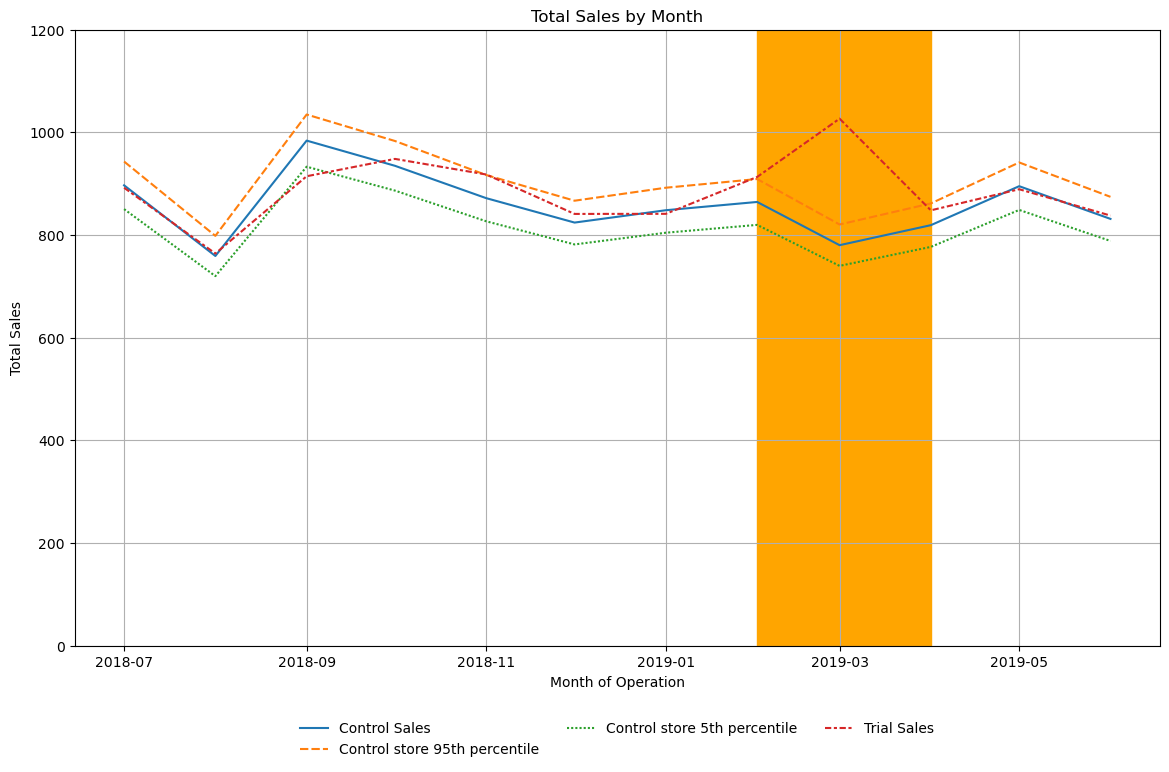

In [93]:
plt.figure(figsize = (14,8))
ax2 = sns.lineplot(data=trialAssessment)

sns.move_legend(
    ax2, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.ylim((0, 1200))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'orange', alpha = 1)
plt.grid()

The trial period is highlighted by the orange strip.
The results show that the trial in store 86 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.
Let's have a look at assessing this for number of customers as well.

In [94]:
trial_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'no_Customers'].sum()
control_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'no_Customers'].sum()
scalingFactorForControlCust = trial_customers / control_customers
scalingFactorForControlCust

1.0

In [95]:
measureOverTimeCusts = measureOverTime
measureOverTimeCusts

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [96]:
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store]
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
1793,155,201807,924.60,101,1.217822,2.032520,3.698400,2018-07-01
1794,155,201808,782.70,91,1.307692,1.924370,3.417904,2018-08-01
1795,155,201809,1014.40,103,1.398058,2.013889,3.497931,2018-09-01
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01
1797,155,201811,898.80,101,1.316832,2.030075,3.328889,2018-11-01
1798,155,201812,849.80,97,1.237113,2.016667,3.511570,2018-12-01
1799,155,201901,874.60,96,1.302083,2.016000,3.470635,2019-01-01
1800,155,201902,891.20,95,1.315789,2.032000,3.508661,2019-02-01
1801,155,201903,804.40,94,1.255319,2.033898,3.351667,2019-03-01
1802,155,201904,844.60,99,1.212121,2.016667,3.490083,2019-04-01


In [100]:
scaledControlCustomers['Control_Customers'] = scaledControlCustomers['no_Customers'] * scalingFactorForControlCust
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth,Control_Customers
1793,155,201807,924.60,101,1.217822,2.032520,3.698400,2018-07-01,101.0
1794,155,201808,782.70,91,1.307692,1.924370,3.417904,2018-08-01,91.0
1795,155,201809,1014.40,103,1.398058,2.013889,3.497931,2018-09-01,103.0
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01,108.0
1797,155,201811,898.80,101,1.316832,2.030075,3.328889,2018-11-01,101.0
1798,155,201812,849.80,97,1.237113,2.016667,3.511570,2018-12-01,97.0
1799,155,201901,874.60,96,1.302083,2.016000,3.470635,2019-01-01,96.0
1800,155,201902,891.20,95,1.315789,2.032000,3.508661,2019-02-01,95.0
1801,155,201903,804.40,94,1.255319,2.033898,3.351667,2019-03-01,94.0
1802,155,201904,844.60,99,1.212121,2.016667,3.490083,2019-04-01,99.0


In [101]:
# Calculate the percentage difference between scaled control customers. and trial customers.

percentageDiff = scaledControlCustomers[['YEARMONTH','Control_Customers']]
percentageDiff.reset_index(drop = True, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers
0,201807,101.0
1,201808,91.0
2,201809,103.0
3,201810,108.0
4,201811,101.0
5,201812,97.0
6,201901,96.0
7,201902,95.0
8,201903,94.0
9,201904,99.0


In [102]:
trial_Customers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'no_Customers']
trial_Customers.reset_index(drop = True, inplace = True)
trial_Customers

0      99
1      94
2     103
3     109
4     100
5      98
6      94
7     107
8     115
9     105
10    104
11     98
Name: no_Customers, dtype: int64

In [103]:
percentageDiff = pd.concat([percentageDiff, trial_Customers], axis = 1)
percentageDiff.rename(columns = {'no_Customers': 'Trial_Customers'}, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers
0,201807,101.0,99
1,201808,91.0,94
2,201809,103.0,103
3,201810,108.0,109
4,201811,101.0,100
5,201812,97.0,98
6,201901,96.0,94
7,201902,95.0,107
8,201903,94.0,115
9,201904,99.0,105


In [104]:
percentageDiff['percentageDiff'] = abs(percentageDiff.Control_Customers - percentageDiff.Trial_Customers) / percentageDiff.Control_Customers
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


Let’s check again if the difference is significant visually!

As our null hypothesis is that the trial period is the same as the pre‐trial period, let's take the standard deviation based on the scaledpercentage difference in the pre‐trial period

In [105]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])

degreesOfFreedom = 7

percentageDiff['T_value'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'T_value']

7    11.819082
8    20.903430
9     5.670772
Name: T_value, dtype: float64

In [106]:
# 95th percentile of the t distribution with degreesOfFreedom = 7

t95 = t.isf(0.05, degreesOfFreedom)
print('95th percentile of the t distribution with the degrees Of Freedom 7   -', t95)

95th percentile of the t distribution with the degrees Of Freedom 7   - 1.8945786050613054


The t-value is much greater than the 95th percentile of the t distribution

In [107]:
controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'Control_Customers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers

,Control_Customers
TransactionMonth,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [108]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, ['TransactionMonth', 'no_Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'no_Customers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [135]:
# Control store 95th percentile
controlCustomers['Control 95th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 + stdDev*2)
controlCustomers['Control 5th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 - stdDev*2)

# Merge trial store as well to the control store dataframe.
trial_86_Customer_Assessment = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
trial_86_Customer_Assessment

,Control_Customers,Control 95th % confidence Interval,Control 5th % confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,101.0,110.119502,91.880498,99
2018-08-01,91.0,99.216581,82.783419,94
2018-09-01,103.0,112.300086,93.699914,103
2018-10-01,108.0,117.751546,98.248454,109
2018-11-01,101.0,110.119502,91.880498,100
2018-12-01,97.0,105.758333,88.241667,98
2019-01-01,96.0,104.668041,87.331959,94
2019-02-01,95.0,103.577749,86.422251,107
2019-03-01,94.0,102.487457,85.512543,115


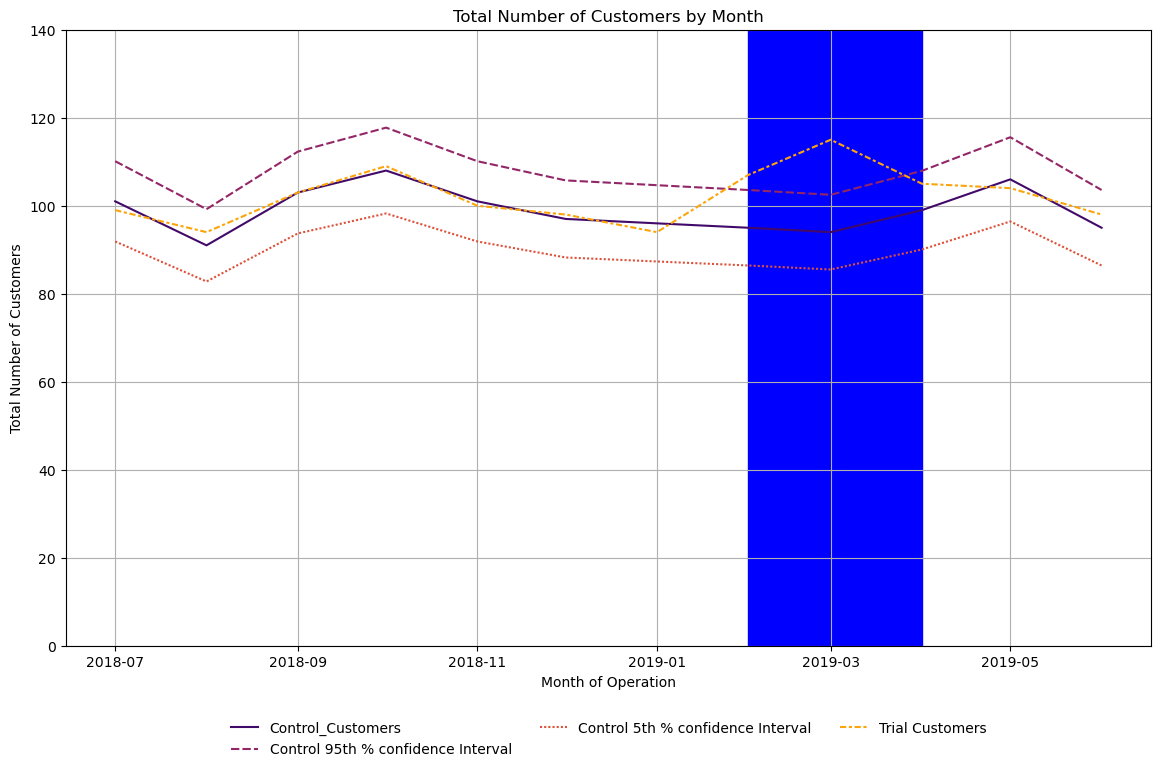

In [137]:
plt.figure(figsize = (14,8))
ax4 = sns.lineplot(data=trial_86_Customer_Assessment, palette = 'inferno')

sns.move_legend(
    ax4, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')
plt.ylim((0,140))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'blue', alpha = 1)
plt.grid()

The trial period is highlighted by the blue strip.
The number of clients appears to have increased dramatically over the course of the three months. This would appear to indicate that the trial greatly increased the number of patrons in trial shop 86, but as we observed, sales were not significantly higher.
We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

# Trial store 88

In [138]:
trial_store = 88

corr_Sales = calculateCorrelation(preTrialMeasures, 'Total Sales', trial_store)
corr_Customers = calculateCorrelation(preTrialMeasures, 'no_Customers', trial_store)

# Compute magnitude with trial store 88
magnitude_Sales = calculateMagnitudeDistance(preTrialMeasures, 'Total Sales', trial_store)
magnitude_Customers = calculateMagnitudeDistance(preTrialMeasures, 'no_Customers', trial_store)
score_Sales = pd.concat([corr_Sales, magnitude_Sales['Magnitude']], axis = 1)
score_Sales

,Store1,Store2,corr_measure,Magnitude
0,88.0,1.0,0.813636,0.548959
1,88.0,2.0,-0.067927,0.541212
2,88.0,3.0,-0.507847,0.458109
3,88.0,4.0,-0.745566,0.484447
4,88.0,5.0,0.190330,0.496409
...,...,...,...,...
255,88.0,268.0,-0.021429,0.522847
256,88.0,269.0,-0.172578,0.564856
257,88.0,270.0,-0.723272,0.513329
258,88.0,271.0,-0.103037,0.429220


In [141]:
score_Customers = pd.concat([corr_Customers, magnitude_Customers['Magnitude']], axis = 1)
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_Sales['scoreSales'] = corr_weight * score_Sales['corr_measure'] + (1 - corr_weight) * score_Sales['Magnitude']
score_Customers['scoreCustomers'] = corr_weight * score_Customers['corr_measure'] + (1 - corr_weight) * score_Customers['Magnitude']
score_Sales.set_index(['Store1', 'Store2'], inplace = True)
score_Customers.set_index(['Store1', 'Store2'], inplace = True)

score_Control = pd.concat([score_Sales['scoreSales'], score_Customers['scoreCustomers']], axis = 1)
score_Control

scoreSales  scoreCustomers
Store1 Store2                            
88.0   1.0       0.681297        0.331238
       2.0       0.236643       -0.083332
       3.0      -0.024869        0.603279
       4.0      -0.130559        0.108210
       5.0       0.343370        0.266561
...                   ...             ...
       268.0     0.250709        0.651462
       269.0     0.196139        0.043061
       270.0    -0.104971        0.132467
       271.0     0.163091        0.318507
       272.0    -0.077482        0.237944

[260 rows x 2 columns]

In [142]:
# Add a new column 'finalControlScore' to 'score_Control'.

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreSales'] + score_Control['scoreCustomers'])
score_Control

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
88.0   1.0       0.681297        0.331238           0.506268
       2.0       0.236643       -0.083332           0.076655
       3.0      -0.024869        0.603279           0.289205
       4.0      -0.130559        0.108210          -0.011175
       5.0       0.343370        0.266561           0.304965
...                   ...             ...                ...
       268.0     0.250709        0.651462           0.451086
       269.0     0.196139        0.043061           0.119600
       270.0    -0.104971        0.132467           0.013748
       271.0     0.163091        0.318507           0.240799
       272.0    -0.077482        0.237944           0.080231

[260 rows x 3 columns]

In [143]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreSales  scoreCustomers  finalControlScore
Store1 Store2                                               
88.0   178.0     0.650803        0.707828           0.679316
       14.0      0.646064        0.685774           0.665919
       134.0     0.775084        0.540154           0.657619
       237.0     0.451974        0.777235           0.614604
       187.0     0.616752        0.594560           0.605656

We've now found store 237 to be a suitable control store for trial store 88.

Now that we have found a control store, let's check if the drivers are visually similar to the period before the trial.

In [144]:
control_store = 237

pastSales = preTrialMeasures

store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,store_type,TransactionMonth,Month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01,Jul
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01,Aug
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01,Sep
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01,Oct
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01,Nov


In [145]:
controlPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'Total Sales']]
controlPlot.set_index('Month', inplace = True)

trialPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'Total Sales']]
trialPlot.set_index('Month', inplace = True)

otherPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'Total Sales']]
otherPlot = pd.DataFrame(otherPlot.groupby('Month')['Total Sales'].mean())

# Renaming Column Names
controlPlot.rename(columns = {'Total Sales': 'Control Store Sales'}, inplace = True)
trialPlot.rename(columns = {'Total Sales': 'Trial Store Sales'}, inplace = True)
otherPlot.rename(columns = {'Total Sales': 'Other Stores Sales'}, inplace = True)

# Concatenate
combinePlot = pd.concat([controlPlot, trialPlot, otherPlot], axis = 1)

combinePlot

,Control Store Sales,Trial Store Sales,Other Stores Sales
Month,,,
Jul,1448.4,1310.0,629.590310
Aug,1367.8,1323.8,601.889341
Sep,1322.2,1423.0,611.317054
Oct,1348.3,1352.4,626.359302
Nov,1397.6,1382.8,609.858527
Dec,1265.0,1325.2,640.534884
Jan,1219.7,1266.4,620.528682


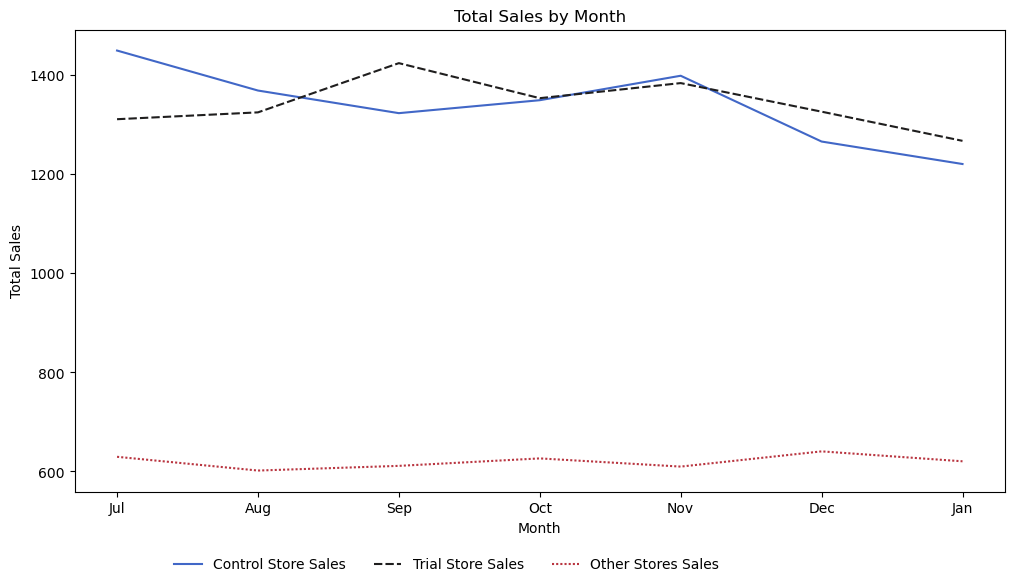

In [146]:
# Plot total Sales for all 3 types of stores


plt.figure(figsize = (12, 6))
plt.title('Total Sales by Month')
ax5 = sns.lineplot(data=combinePlot, palette="icefire")

plt.ylabel("Total Sales")
sns.move_legend(
    ax5, "lower center",
    bbox_to_anchor=(0.4, -.2),
    ncol=3,
    frameon=False,
)

# Visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [147]:
control_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['Month', 'no_Customers']]
control_Customer_Plot.set_index('Month', inplace = True)

trial_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['Month', 'no_Customers']]
trial_Customer_Plot.set_index('Month', inplace = True)

other_Customer_Plot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['Month', 'no_Customers']]
other_Customer_Plot = pd.DataFrame(other_Customer_Plot.groupby('Month')['no_Customers'].mean())

# Renaming Column Names
control_Customer_Plot.rename(columns = {'no_Customers': 'Control Store Customers'}, inplace = True)
trial_Customer_Plot.rename(columns = {'no_Customers': 'Trial Store Customers'}, inplace = True)
other_Customer_Plot.rename(columns = {'no_Customers': 'Other Stores Customers'}, inplace = True)

# Concatenate
combine_Customer_Plot = pd.concat([control_Customer_Plot, trial_Customer_Plot, other_Customer_Plot], axis = 1)

combine_Customer_Plot

,Control Store Customers,Trial Store Customers,Other Stores Customers
Month,,,
Jul,128,129,71.732558
Aug,135,131,71.457364
Sep,126,124,69.488372
Oct,123,123,70.934109
Nov,132,130,69.833333
Dec,124,126,72.906977
Jan,117,117,70.604651


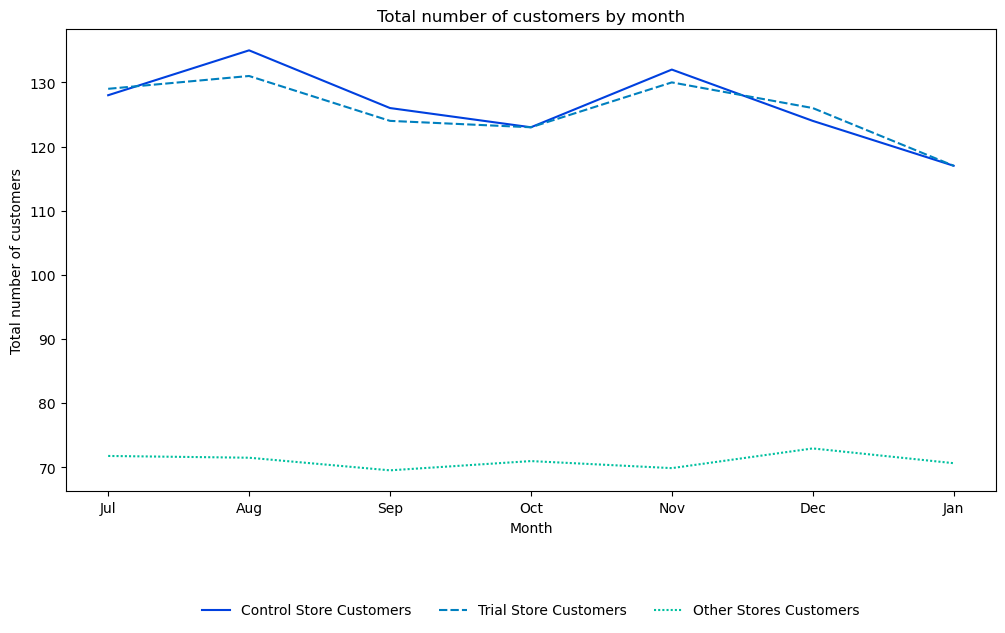

In [148]:
# Plot total number of customers for all 3 types of stores

plt.figure(figsize = (12, 6))
plt.title('Total number of customers by month')
ax6 = sns.lineplot(data=combine_Customer_Plot, palette="winter")

plt.ylabel("Total number of customers")
sns.move_legend(
    ax6, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    frameon=False,
)


# Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

In [149]:
# Scale pre-trial control sales to match pre-trial trial store sales

trial_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Total Sales'].sum()
control_sales_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store' , 'Total Sales'].sum()
scalingFactorForControlSales = trial_sales_sum/ control_sales_sum
scalingFactorForControlSales

1.001558330664959

In [150]:
# Apply the scaling factor

measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['Total Sales'] * scalingFactorForControlSales
scaledControlSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,1399.777923
2752,237,201812,1265.0,124,1.161290,2.006944,4.377163,2018-12-01,1266.971288
2753,237,201901,1219.7,117,1.188034,1.992806,4.403249,2019-01-01,1221.600696
2754,237,201902,1404.8,126,1.246032,2.000000,4.473885,2019-02-01,1406.989143
2755,237,201903,1208.2,119,1.126050,2.044776,4.409489,2019-03-01,1210.082775
2756,237,201904,1204.6,120,1.125000,2.014815,4.428676,2019-04-01,1206.477165


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [151]:
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)
trial_sales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store , 'Total Sales']
trial_sales.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trial_sales], axis = 1)
percentageDiff.rename(columns = {'Total Sales': 'Trial_Sales'}, inplace = True)
percentageDiff

,YEARMONTH,controlSales,Trial_Sales
0,201807,1450.657086,1310.00
1,201808,1369.931485,1323.80
2,201809,1324.260425,1423.00
3,201810,1350.401097,1352.40
4,201811,1399.777923,1382.80
5,201812,1266.971288,1325.20
6,201901,1221.600696,1266.40
7,201902,1406.989143,1370.20
8,201903,1210.082775,1477.20
9,201904,1206.477165,1439.40


In [152]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.Trial_Sales) / percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,Trial_Sales,percentageDiff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [153]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.0334678673030788

In [154]:
# Note that there are 8 months in the pre-trial period , Hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7
# We will test with a null hypothesis of there being 0 difference between trial and control stores.
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] < 201905 ) & (percentageDiff['YEARMONTH'] > 201901), 'tValue']

7    0.781270
8    6.595668
9    5.768527
Name: tValue, dtype: float64

In [155]:
# Find the 95th percentile of the t distribution with the degreesOfFreedom = 7

t95 = t.isf(0.05, degreesOfFreedom)
print('95th percentile of the t distribution with the degrees Of Freedom 7   -', t95)

95th percentile of the t distribution with the degrees Of Freedom 7   - 1.8945786050613054


It can be observed that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [156]:
measureOverTimeSales = measureOverTime
measureOverTimeSales

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [157]:
# Trial and control store total sales

pastSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Total Sales']]
pastSales.set_index('TransactionMonth', inplace = True)
pastSales.rename(columns = {'Total Sales': 'Trial Sales'}, inplace = True)
pastSales

,Trial Sales
TransactionMonth,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [158]:
# Control store 95th percentile

controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionMonth,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [159]:
# Control store 95th percentile
controlSales['Control store 95th percentile'] = controlSales['Control Sales'] * (1 + stdDev*2)

# Control store 5th percentile

controlSales['Control store 5th percentile'] = controlSales['Control Sales'] * (1 - stdDev*2)

controlSales

,Control Sales,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,
2018-07-01,1450.657086,1547.757884,1353.556288
2018-08-01,1369.931485,1461.628855,1278.234114
2018-09-01,1324.260425,1412.900769,1235.620080
2018-10-01,1350.401097,1440.791187,1260.011008
2018-11-01,1399.777923,1493.473086,1306.082759
2018-12-01,1266.971288,1351.776942,1182.165634
2019-01-01,1221.600696,1303.369436,1139.831956
2019-02-01,1406.989143,1501.166995,1312.811291
2019-03-01,1210.082775,1291.080555,1129.084996


In [160]:
trialAssessment = pd.merge(controlSales, pastSales, left_index = True, right_index = True)
trialAssessment

,Control Sales,Control store 95th percentile,Control store 5th percentile,Trial Sales
TransactionMonth,,,,
2018-07-01,1450.657086,1547.757884,1353.556288,1310.00
2018-08-01,1369.931485,1461.628855,1278.234114,1323.80
2018-09-01,1324.260425,1412.900769,1235.620080,1423.00
2018-10-01,1350.401097,1440.791187,1260.011008,1352.40
2018-11-01,1399.777923,1493.473086,1306.082759,1382.80
2018-12-01,1266.971288,1351.776942,1182.165634,1325.20
2019-01-01,1221.600696,1303.369436,1139.831956,1266.40
2019-02-01,1406.989143,1501.166995,1312.811291,1370.20
2019-03-01,1210.082775,1291.080555,1129.084996,1477.20


Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

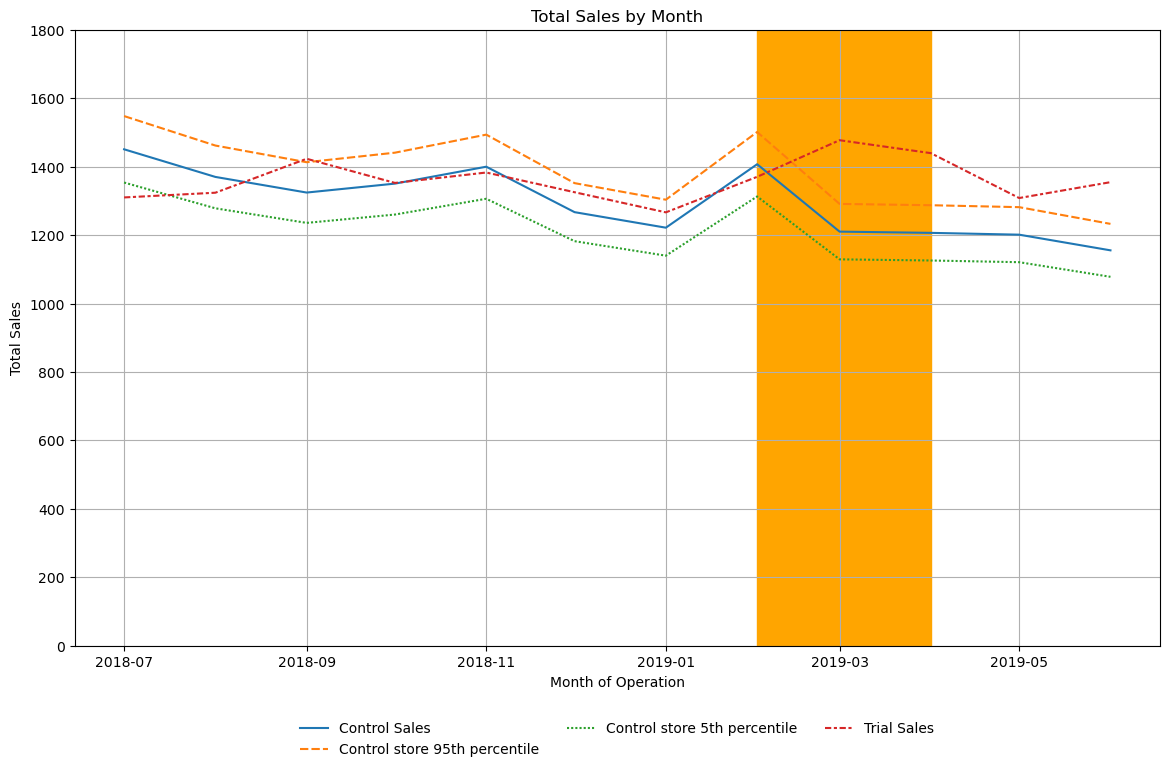

In [161]:
plt.figure(figsize = (14,8))
ax7 = sns.lineplot(data=trialAssessment)

sns.move_legend(
    ax7, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.ylim((0, 1800))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'orange', alpha = 1)
plt.grid()

The trial period is highlighted by the orange strip.
The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

# Let's have a look at assessing this for number of customers as well.

In [162]:
trial_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'no_Customers'].sum()
control_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'no_Customers'].sum()
scalingFactorForControlCust = trial_customers / control_customers
scalingFactorForControlCust

0.9943502824858758

In [163]:
measureOverTimeCusts = measureOverTime
measureOverTimeCusts

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154,2019-02-01
3165,272,201903,442.3,50,1.060000,1.905660,4.379208,2019-03-01
3166,272,201904,445.1,54,1.018519,1.909091,4.239048,2019-04-01
3167,272,201905,314.6,34,1.176471,1.775000,4.430986,2019-05-01


In [164]:
scaledControlCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store]
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01
2752,237,201812,1265.0,124,1.161290,2.006944,4.377163,2018-12-01
2753,237,201901,1219.7,117,1.188034,1.992806,4.403249,2019-01-01
2754,237,201902,1404.8,126,1.246032,2.000000,4.473885,2019-02-01
2755,237,201903,1208.2,119,1.126050,2.044776,4.409489,2019-03-01
2756,237,201904,1204.6,120,1.125000,2.014815,4.428676,2019-04-01


In [165]:
scaledControlCustomers['Control_Customers'] = scaledControlCustomers['no_Customers'] * scalingFactorForControlCust
scaledControlCustomers

,STORE_NBR,YEARMONTH,Total Sales,no_Customers,trans_per_customer,chips_per_customer,average_price,TransactionMonth,Control_Customers
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,127.276836
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,134.237288
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,125.288136
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,122.305085
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,131.254237
2752,237,201812,1265.0,124,1.161290,2.006944,4.377163,2018-12-01,123.299435
2753,237,201901,1219.7,117,1.188034,1.992806,4.403249,2019-01-01,116.338983
2754,237,201902,1404.8,126,1.246032,2.000000,4.473885,2019-02-01,125.288136
2755,237,201903,1208.2,119,1.126050,2.044776,4.409489,2019-03-01,118.327684
2756,237,201904,1204.6,120,1.125000,2.014815,4.428676,2019-04-01,119.322034


In [166]:
# Calculate the percentage difference between scaled control customers. and trial customers.

percentageDiff = scaledControlCustomers[['YEARMONTH','Control_Customers']]
percentageDiff.reset_index(drop = True, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers
0,201807,127.276836
1,201808,134.237288
2,201809,125.288136
3,201810,122.305085
4,201811,131.254237
5,201812,123.299435
6,201901,116.338983
7,201902,125.288136
8,201903,118.327684
9,201904,119.322034


In [167]:
trial_Customers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'no_Customers']
trial_Customers.reset_index(drop = True, inplace = True)
trial_Customers

0     129
1     131
2     124
3     123
4     130
5     126
6     117
7     124
8     134
9     128
10    128
11    121
Name: no_Customers, dtype: int64

In [168]:
percentageDiff = pd.concat([percentageDiff, trial_Customers], axis = 1)
percentageDiff.rename(columns = {'no_Customers': 'Trial_Customers'}, inplace = True)
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers
0,201807,127.276836,129
1,201808,134.237288,131
2,201809,125.288136,124
3,201810,122.305085,123
4,201811,131.254237,130
5,201812,123.299435,126
6,201901,116.338983,117
7,201902,125.288136,124
8,201903,118.327684,134
9,201904,119.322034,128


In [169]:
percentageDiff['percentageDiff'] = abs(percentageDiff.Control_Customers - percentageDiff.Trial_Customers) / percentageDiff.Control_Customers
percentageDiff

,YEARMONTH,Control_Customers,Trial_Customers,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556
5,201812,123.299435,126,0.021902
6,201901,116.338983,117,0.005682
7,201902,125.288136,124,0.010281
8,201903,118.327684,134,0.132448
9,201904,119.322034,128,0.072727


Let’s check if the difference is significant visually!

As the null hypothesis is that the trial period is the same as the pre‐trial period, let's take the standard deviation based on the scaledpercentage difference in the pre‐trial period

In [170]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])

degreesOfFreedom = 7

percentageDiff['T_value'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'T_value']

7     1.387456
8    17.873693
9     9.814423
Name: T_value, dtype: float64

In [171]:
# Find the 95th percentile of the t distribution with the degreesOfFreedom = 7

t95 = t.isf(0.05, degreesOfFreedom)
print('95th percentile of the t distribution with the degrees Of Freedom 7   -', t95)

95th percentile of the t distribution with the degrees Of Freedom 7   - 1.8945786050613054


The t-value is much greater than the 95th percentile of the t distribution

In [172]:
controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'Control_Customers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers

,Control_Customers
TransactionMonth,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [173]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, ['TransactionMonth', 'no_Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'no_Customers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [174]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, ['TransactionMonth', 'no_Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'no_Customers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [175]:
# Control store 95th percentile
controlCustomers['Control 95th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 + stdDev*2)
controlCustomers['Control 5th % confidence Interval'] = controlCustomers['Control_Customers'] * (1 - stdDev*2)

# Merge trial store as well to the control store dataframe.
trial_88_Customer_Assessment = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
trial_88_Customer_Assessment

,Control_Customers,Control 95th % confidence Interval,Control 5th % confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,127.276836,129.163141,125.390531,129
2018-08-01,134.237288,136.226750,132.247826,131
2018-09-01,125.288136,127.144967,123.431304,124
2018-10-01,122.305085,124.117706,120.492464,123
2018-11-01,131.254237,133.199489,129.308985,130
2018-12-01,123.299435,125.126793,121.472077,126
2019-01-01,116.338983,118.063184,114.614782,117
2019-02-01,125.288136,127.144967,123.431304,124
2019-03-01,118.327684,120.081358,116.574010,134


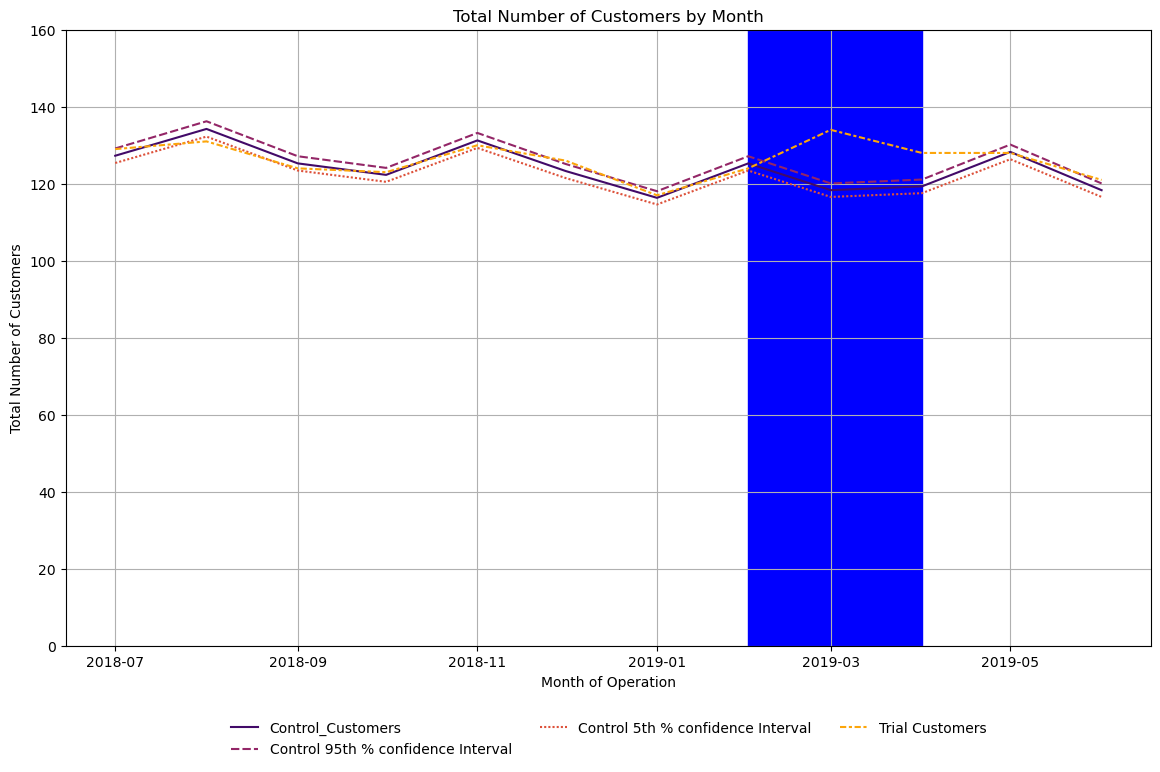

In [176]:
plt.figure(figsize = (14,8))
ax8 = sns.lineplot(data=trial_88_Customer_Assessment, palette = 'inferno')

sns.move_legend(
    ax8, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    frameon=False,
)

plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')
plt.ylim((0, 160))


plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'blue', alpha = 1)
plt.grid()

The trial period is highlighted by the blue strip
Total number of customers in the trial period for the trial store is significantly higher than the control store or two out of three months, which indicates a positive trial effect.

# Conclusion
We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.
Now that we have finished our analysis, we can prepare our presentation to the Category Manager.